<a href="https://colab.research.google.com/github/charlie-51135/Intro-to-ML/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Intro-to-ML/Housing.csv'
housing = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
# Check for null values
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [182]:
# Replace yes/no data
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(binary_map)

In [183]:
# Split training and test data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
X_train = df_train
y_val = df_test.pop('price')
X_val = df_test

In [184]:
# Gradient descent function
def gradient_descent(X_train, X_val, y_train, y_val, alpha, iterations):

    # Add bias column
    X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]
    m, n = X_b_train.shape

    theta = np.zeros(n)
    train_losses = []
    val_losses = []

    for i in range(iterations):
        gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
        theta -= alpha * gradients

        train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    print("Theta values:")
    print(theta)
    print("Validation loss:")
    print(val_losses[-1])

    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.title("Training and Validation Loss Over Iterations")
    plt.show()

# **Problem 1: A**

Theta values:
[2.14541695e-01 8.60229543e+02 6.96990785e-01 3.48577657e-01
 5.07061688e-01 1.77907192e-01]
Validation loss:
3215772214923.9893


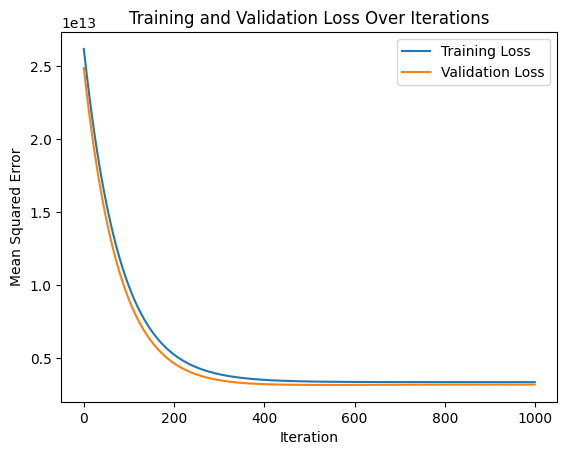

In [185]:
input_vars_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_train_1a = X_train[input_vars_a]
X_val_1a = X_val[input_vars_a]

iterations = 1000
alpha = 0.0000000001
gradient_descent(X_train_1a, X_val_1a, y_train, y_val, alpha, iterations)

# **Problem 1: B**

Theta values:
[2.14541685e-01 8.60229500e+02 6.96990754e-01 3.48577643e-01
 5.07061668e-01 1.90942911e-01 5.59292569e-02 9.56669453e-02
 2.13994831e-02 1.09872923e-01 1.77907185e-01 6.78150546e-02]
Validation loss:
3215771891165.948


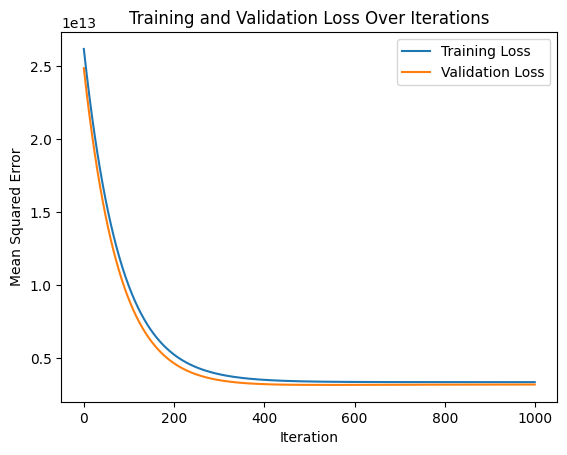

In [186]:
input_vars_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_train_1b = X_train[input_vars_b]
X_val_1b = X_val[input_vars_b]

iterations = 1000
alpha = 0.0000000001
gradient_descent(X_train_1b, X_val_1b, y_train, y_val, alpha, iterations)

# **Problem 2: A-standardization**

Theta values:
[3022831.12000227 1632027.16515921 1439985.55973345 1276290.6054386
 1544970.75673438 1349879.93408192]
Validation loss:
1636616569155.9482


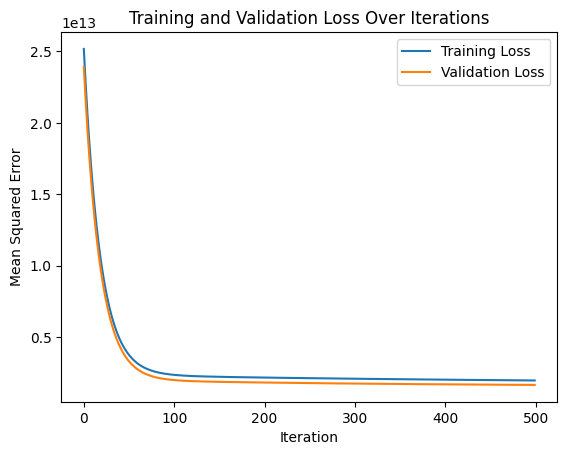

In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no'
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X_train_2a_std = X_train_1a.copy()
X_val_2a_std = X_val_1a.copy()
X_train_2a_std[num_vars] = scaler.fit_transform(X_train_2a_std[num_vars])
X_val_2a_std[num_vars] = scaler.fit_transform(X_val_2a_std[num_vars])

iterations = 500
alpha = 0.01
gradient_descent(X_train_2a_std, X_val_2a_std, y_train, y_val, alpha, iterations)

# **Problem 2: A-normalization**

Theta values:
[4795532.4802592   729768.06544825   80274.51822501  640897.18710692
  463267.83023465  287404.10709866]
Validation loss:
1609424343847.3003


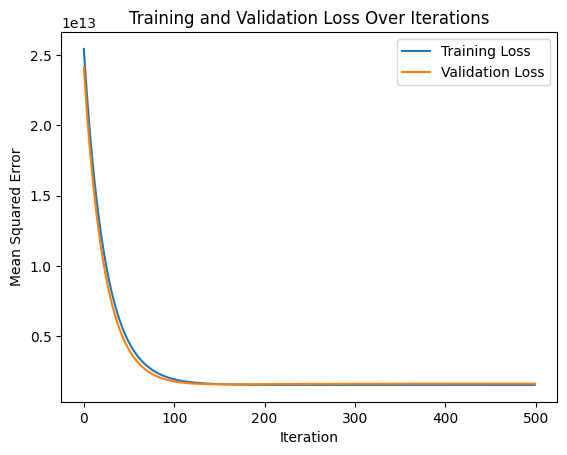

In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no'
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X_train_2a_norm = X_train_1a.copy()
X_val_2a_norm = X_val_1a.copy()
X_train_2a_norm[num_vars] = scaler.fit_transform(X_train_2a_norm[num_vars])
X_val_2a_norm[num_vars] = scaler.fit_transform(X_val_2a_norm[num_vars])

iterations = 500
alpha = 0.01
gradient_descent(X_train_2a_norm, X_val_2a_norm, y_train, y_val, alpha, iterations)

# **Problem 2: B-standardization**

Theta values:
[1794105.36834644 1040787.52173454 1009720.07479444 1092670.64200842
 1179184.28302897 1158906.12227032  515945.25018848  369418.26128065
  496349.1601849  1098106.29943351  924912.16915336  631307.00935071]
Validation loss:
1258049616941.4


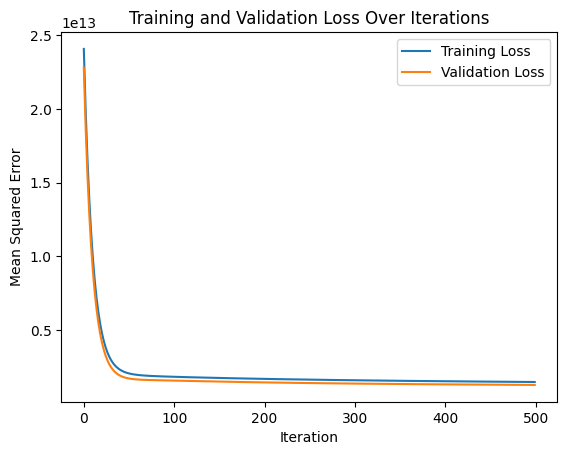

In [189]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no'
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X_train_2b_std = X_train_1b.copy()
X_val_2b_std = X_val_1b.copy()
X_train_2b_std[num_vars] = scaler.fit_transform(X_train_2b_std[num_vars])
X_val_2b_std[num_vars] = scaler.fit_transform(X_val_2b_std[num_vars])

iterations = 500
alpha = 0.01
gradient_descent(X_train_2b_std, X_val_2b_std, y_train, y_val, alpha, iterations)

# **Problem 2: B-normalization**

Theta values:
[2862864.70154783  442717.76343906   93854.14893592  603816.75371817
  335310.70858817 1452501.63330514  350173.92861167  427566.47939438
  457937.11156923  906776.51882677  196432.27082286  538720.352108  ]
Validation loss:
1372386569358.4998


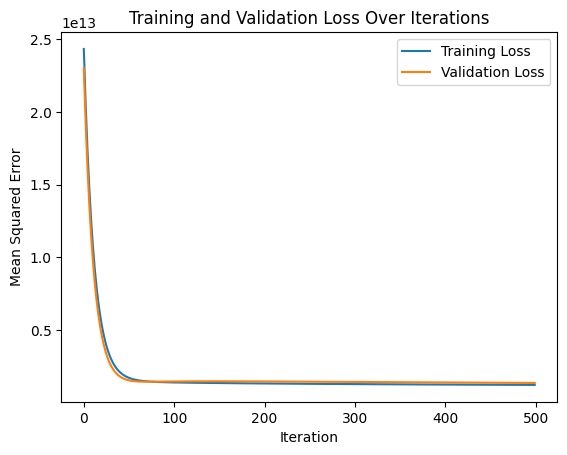

In [190]:
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no'
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X_train_2b_norm = X_train_1b.copy()
X_val_2b_norm = X_val_1b.copy()
X_train_2b_norm[num_vars] = scaler.fit_transform(X_train_2b_norm[num_vars])
X_val_2b_norm[num_vars] = scaler.fit_transform(X_val_2b_norm[num_vars])

iterations = 500
alpha = 0.01
gradient_descent(X_train_2b_norm, X_val_2b_norm, y_train, y_val, alpha, iterations)

# **Problem 3: A-standardization**


Theta values:
[2552875.90033753 3320987.06066863 1142666.06697235 2733739.52876173
 1591911.22875449 1249342.82823681]
Validation loss:
1612608701890.0942


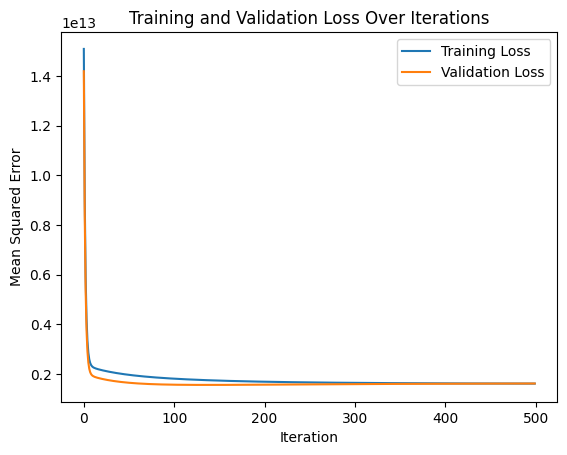

In [191]:
# Gradient descent function with parameters penalty (regularization term)
def gradient_descent_reg(X_train, X_val, y_train, y_val, alpha, lambda_var, iterations):

    # Add bias column
    X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]
    m, n = X_b_train.shape

    theta = np.zeros(n)
    train_losses = []
    val_losses = []

    for i in range(iterations):
        gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
        theta = theta * (1 - (alpha * lambda_var) / m) - (alpha * gradients)

        train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    print("Theta values:")
    print(theta)
    print("Validation loss:")
    print(val_losses[-1])

    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.title("Training and Validation Loss Over Iterations")
    plt.show()

iterations = 500
alpha = 0.1
lambda_var = 10
gradient_descent_reg(X_train_2a_std, X_val_2a_std, y_train, y_val, alpha, lambda_var, iterations)

# **Problem 3: A-normalization**




Theta values:
[4741182.84611778  722515.75634341   84377.62623217  634974.36101228
  458779.7669194   286972.68900972]
Validation loss:
1592854305293.7314


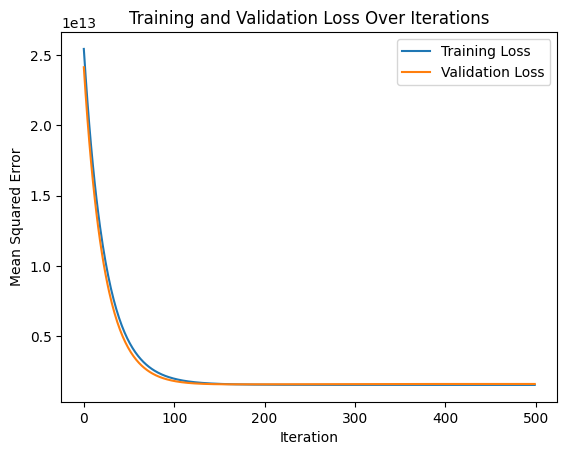

In [192]:
iterations = 500
alpha = 0.01
lambda_var = 10
gradient_descent_reg(X_train_2a_norm, X_val_2a_norm, y_train, y_val, alpha, lambda_var, iterations)

# **Problem 3: B-standardization**


Theta values:
[1793788.12461408 1037496.81181494 1008201.29961759 1087960.68731749
 1176229.3931684  1161015.23306459  515174.63361639  370612.43760999
  494251.62171314 1096465.75258593  922752.38919187  630569.20450872]
Validation loss:
1258414320139.4485


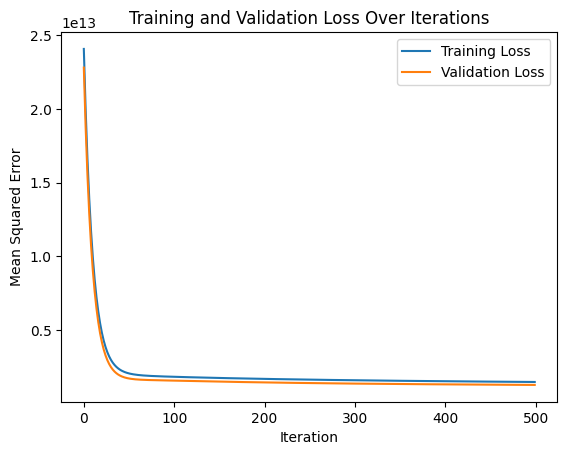

In [193]:
iterations = 500
alpha = 0.01
lambda_var = 1
gradient_descent_reg(X_train_2b_std, X_val_2b_std, y_train, y_val, alpha, lambda_var, iterations)

# **Problem 3: B-normalization**


Theta values:
[3610756.66634381  529076.42186874   73904.76049046  578861.79841184
  366002.66553014  642955.81776385  385783.34392858  308800.75983811
  881034.18653926  873406.11896501  221433.70772786  603387.92567117]
Validation loss:
1179769844154.2124


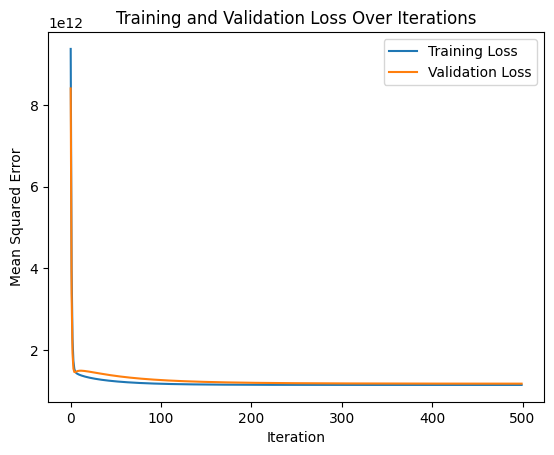

In [194]:
iterations = 500
alpha = 0.1
lambda_var = 1
gradient_descent_reg(X_train_2b_norm, X_val_2b_norm, y_train, y_val, alpha, lambda_var, iterations)